In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
import sys
sys.path.append('./lib')
from lib.cleaning import *
SEED = 448

In [2]:
df=pd.read_csv(f'..\\data\\one_percent_books.csv', low_memory=False)
df_copy=df.copy()
df = df.iloc[:, 2:]


In [3]:
new_column_names = [col.lower().replace('review/', '') for col in df.columns]
df.rename(columns=dict(zip(df.columns, new_column_names)),inplace=True)
df.sample(3)

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
18157,The Catcher in the Rye,NaN,0/1,4.0,1014336000,"Digression, Digression, Digression",This book is one for people who like DIGRESSIO...,NaN,NaN,NaN,NaN,NaN,NaN
2478,The Viaduct,NaN,0/0,5.0,1199059200,"Mystery, history and imagination",Phil Benson lives with his Grandfather in Dept...,NaN,['Ronald Arbuthnott Knox'],NaN,1926,NaN,NaN
12658,Atlas Shrugged,NaN,1/4,5.0,1358812800,"loved the book, loved the service","loved the book, loved the service......no more...",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['title', 'price', 'helpfulness', 'score', 'time', 'summary', 'text',
       'description', 'authors', 'publisher', 'publisheddate', 'categories',
       'ratingscount'],
      dtype='object')

In [5]:
print(len(df))
print(df.info())
print(df.describe())

30000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          29998 non-null  object 
 1   price          4863 non-null   float64
 2   helpfulness    30000 non-null  object 
 3   score          30000 non-null  float64
 4   time           30000 non-null  int64  
 5   summary        29993 non-null  object 
 6   text           30000 non-null  object 
 7   description    23556 non-null  object 
 8   authors        26058 non-null  object 
 9   publisher      21971 non-null  object 
 10  publisheddate  26406 non-null  object 
 11  categories     24369 non-null  object 
 12  ratingscount   16322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 3.0+ MB
None
             price         score          time  ratingscount
count  4863.000000  30000.000000  3.000000e+04  16322.000000
mean     21.296901      4.223367  1.

In [6]:
df.isnull().sum()

title                2
price            25137
helpfulness          0
score                0
time                 0
summary              7
text                 0
description       6444
authors           3942
publisher         8029
publisheddate     3594
categories        5631
ratingscount     13678
dtype: int64

In [7]:
df=df.applymap(lambda x: x.lower() if type(x) is str else x)
df.sample(3)

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
2578,an outcast of the islands (collected works of ...,88.39,16/18,4.0,1005350400,...the second white mans grave in sambir,&quot;i know the white man...in many lands hav...,NaN,['joseph conrad'],NaN,1995,NaN,NaN
7137,innocence,18.96,4/7,1.0,968112000,a terrible second novel,please. this is the same author who wrote i wa...,new york times bestseller • includes dean koon...,['dean koontz'],bantam,2013-12-10,['fiction'],4.0
10096,the poisonwood bible : a novel,NaN,7/27,2.0,965347200,"very diappointing, from such a great author!","unlike just about everyone else on the planet,...",'breathtaking.' sunday times 'exquisite.' the ...,['barbara kingsolver'],faber & faber,2008-09-04,['fiction'],280.0


In [8]:
df.fillna(np.nan, inplace=True)
sample=df.copy().sample(10000)
print(sample.isnull().sum())

find = ['publisher', 'price', 'authors', 'authors', 'publisher','title']
by =['title', 'title', 'title', 'publisher', 'authors','publisher']
df_filled =fill_find_by_book(sample,find,by)
df_filled=pd.DataFrame(df_filled)
for i in range(10):
    df_filled =fill_find_by_book(df_filled,find,by)
    df_filled=pd.DataFrame(df_filled)
df_filled.isnull().sum()

title               1
price            8369
helpfulness         0
score               0
time                0
summary             3
text                0
description      2132
authors          1320
publisher        2683
publisheddate    1204
categories       1894
ratingscount     4540
dtype: int64


title               1
price            8227
helpfulness         0
score               0
time                0
summary             3
text                0
description      2132
authors          1220
publisher        2171
publisheddate    1204
categories       1894
ratingscount     4540
dtype: int64

In [9]:
df_filled=normalize_column(df_filled,'helpfulness')
df=df_filled
vals=df.helpfulness.value_counts()
#vals=vals[vals>5]
for i in vals.items():
    print(i)
vals[1]

(0.0, 3705)
(1.0, 1690)
(2.0, 1030)
(3.0, 708)
(4.0, 506)
(5.0, 333)
(6.0, 292)
(7.0, 243)
(8.0, 175)
(10.0, 137)
(9.0, 135)
(11.0, 104)
(12.0, 104)
(13.0, 75)
(14.0, 68)
(15.0, 61)
(16.0, 51)
(17.0, 41)
(20.0, 37)
(19.0, 33)
(18.0, 33)
(21.0, 33)
(24.0, 23)
(23.0, 22)
(28.0, 18)
(30.0, 18)
(29.0, 17)
(27.0, 16)
(26.0, 15)
(37.0, 14)
(36.0, 14)
(22.0, 14)
(32.0, 14)
(39.0, 14)
(25.0, 13)
(33.0, 12)
(34.0, 11)
(31.0, 10)
(38.0, 10)
(43.0, 8)
(46.0, 8)
(40.0, 6)
(41.0, 6)
(48.0, 6)
(66.0, 5)
(62.0, 5)
(70.0, 4)
(50.0, 4)
(63.0, 4)
(35.0, 4)
(78.0, 4)
(42.0, 4)
(73.0, 3)
(55.0, 3)
(72.0, 3)
(52.0, 3)
(44.0, 3)
(84.0, 2)
(47.0, 2)
(51.0, 2)
(61.0, 2)
(80.0, 2)
(58.0, 2)
(69.0, 2)
(65.0, 2)
(45.0, 2)
(87.0, 2)
(71.0, 2)
(56.0, 2)
(53.0, 2)
(54.0, 2)
(126.0, 2)
(49.0, 2)
(141.0, 1)
(93.0, 1)
(251.0, 1)
(57.0, 1)
(90.0, 1)
(245.0, 1)
(83.0, 1)
(280.0, 1)
(189.0, 1)
(152.0, 1)
(110.0, 1)
(82.0, 1)
(136.0, 1)
(153.0, 1)
(79.0, 1)
(97.0, 1)
(242.0, 1)
(864.0, 1)
(99.0, 1)
(112.0, 1)
(107.0, 1)
(

1690

In [10]:

# Assuming these columns exist in your DataFrame 'df'
specific_columns = df.columns

# Get value counts for each column
for col in specific_columns:
  value_counts = df[col].value_counts()
  print(f"Value counts for column '{col}':")
  print(value_counts)
  print('---'*20)
  print("\n")  # Add a newline for better readability


Value counts for column 'title':
title
the hobbit                                                                                                       66
pride and prejudice                                                                                              66
wuthering heights                                                                                                40
of mice and men                                                                                                  36
atlas shrugged                                                                                                   35
                                                                                                                 ..
human croquet                                                                                                     1
vita nuova (the world's classics)                                                                                 1
wedding for a knight (warner fore

In [11]:
# Check for outliers (boxplots, histograms)
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_nums=df[numerical_cols]
df_cats=df[df.select_dtypes(include='object').columns]

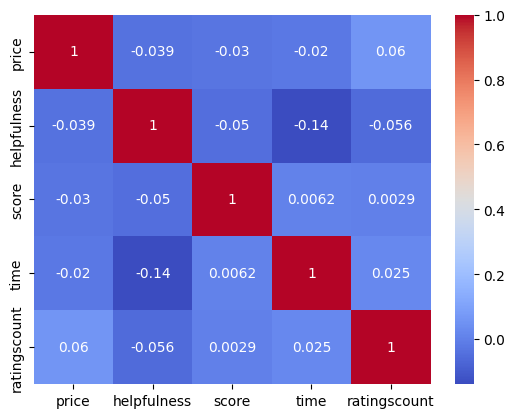

In [12]:
corr_matrix = df_nums.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()